In [303]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from pathlib import Path

In [304]:
read_Ger_path = Path("__file__").parent.joinpath("Raw_Data", "Electricity_Data").parent.joinpath("Electricity_Data", "Germany Electricity Spot Price.csv")
Ger_df = pd.read_csv(read_Ger_path, sep = ",")
Ger_df["Country"] = "Germany"
Ger_df = Ger_df[["Date", "Country", "Close"]]
Ger_df["Date"] = pd.to_datetime(Ger_df["Date"], format = '%d/%m/%Y')
Ger_df.sort_values(by = "Date", ascending= True,inplace = True)
#Ger_df.rename(columns = {'Close':'Germany Price'}, inplace = True)
Ger_df.head()

,Date,Country,Close
1496,2018-09-30,Germany,61.24
1495,2018-10-01,Germany,42.34
1494,2018-10-02,Germany,18.29
1493,2018-10-03,Germany,65.15
1492,2018-10-04,Germany,60.30


In [305]:
read_Spn_path = Path("__file__").parent.joinpath("Raw_Data", "Electricity_Data").parent.joinpath("Electricity_Data", "Spain Electricity Spot Price.csv")
Spn_df = pd.read_csv(read_Spn_path, sep = ",")
Spn_df["Country"] = "Spain"
Spn_df = Spn_df[["Date", "Country", "Close"]]
Spn_df["Date"] = pd.to_datetime(Spn_df["Date"], format = '%d/%m/%Y')
Spn_df.sort_values(by = "Date", ascending= True,inplace = True)
#Spn_df.rename(columns = {'Close':'Spain Price'}, inplace = True)
Spn_df.head()

,Date,Country,Close
2603,2012-11-07,Spain,37.83
2602,2012-11-08,Spain,44.21
2601,2012-11-09,Spain,53.53
2600,2012-11-12,Spain,46.15
2599,2012-11-13,Spain,48.43


In [306]:
read_Fra_path = Path("__file__").parent.joinpath("Raw_Data", "Electricity_Data").parent.joinpath("Electricity_Data", "France Electricity Spot Price.csv")
Fra_df = pd.read_csv(read_Fra_path, sep = ",")
Fra_df["Country"] = "France"
Fra_df = Fra_df[["Date", "Country", "Close"]]
Fra_df["Date"] = pd.to_datetime(Fra_df["Date"], format = '%d/%m/%Y')
Fra_df.sort_values(by = "Date", ascending= True,inplace = True)
#Fra_df.rename(columns = {'Close':'France Price'}, inplace = True)
Fra_df.head()

,Date,Country,Close
1889,2012-11-09,France,49.43
1888,2012-11-12,France,50.03
1887,2012-11-13,France,49.93
1886,2012-11-14,France,50.16
1885,2012-11-16,France,49.89


In [307]:
read_Ita_path = Path("__file__").parent.joinpath("Raw_Data", "Electricity_Data").parent.joinpath("Electricity_Data", "Italy Electricity Spot Price.csv")
Ita_df = pd.read_csv(read_Ita_path, sep = ",", header = 0)
Ita_df["Country"] = "Italy"
Ita_df = Ita_df[["Date", "Country", "Close"]]
Ita_df["Date"] = pd.to_datetime(Ita_df["Date"], format = '%d/%m/%Y')
Ita_df.sort_values(by = "Date", ascending= True,inplace = True)
#Ita_df.rename(columns = {'Close':'Italy Price'}, inplace = True)
Ita_df.head()

,Date,Country,Close
2603,2012-11-07,Italy,64.27
2602,2012-11-08,Italy,65.06
2601,2012-11-09,Italy,69.89
2600,2012-11-12,Italy,62.71
2599,2012-11-13,Italy,63.90


In [308]:
df = Ger_df.append(Ita_df).append(Spn_df).append(Fra_df).reset_index()
df = df[["Date", "Country", "Close"]]
#df = df.append(Spn_df)

C:\Users\rafir\AppData\Local\Temp\ipykernel_21084\3090606971.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = Ger_df.append(Ita_df).append(Spn_df).append(Fra_df).reset_index()
C:\Users\rafir\AppData\Local\Temp\ipykernel_21084\3090606971.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = Ger_df.append(Ita_df).append(Spn_df).append(Fra_df).reset_index()
C:\Users\rafir\AppData\Local\Temp\ipykernel_21084\3090606971.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = Ger_df.append(Ita_df).append(Spn_df).append(Fra_df).reset_index()


In [309]:
#write_df_path = Path("__file__").parent.joinpath("Manipulated_Data", "Electricity_Data").parent.joinpath("Electricity_Data", "Merged Data.csv")
#df.to_csv(write_df_path)

In [310]:
read_pop_path = Path("__file__").parent.joinpath("Raw_Data", "Electricity_Data").parent.joinpath("Electricity_Data", "Country Pop.xlsx")
pop_df = pd.read_excel(read_pop_path, index_col = "Year")
pop_df = pop_df[["Germany", "France", "Spain", "Italy"]]

pop_df.head(10)

,Germany,France,Spain,Italy
Year,,,,
2022,83369843,64626628,47558630,59037474
2021,83408554,64531444,47486935,59240329
2020,83328988,64480053,47363807,59500579
2019,83148141,64399759,47131372,59727932
2018,82896696,64277808,46792043,59877425
2017,0,64144086,46584170,60004032
2016,0,63989319,46473315,60118626
2015,0,63809769,46431342,60232906
2014,0,63588491,46464551,60322791


In [311]:
countries = df["Country"]
dates = pd.to_datetime(df['Date'], format = '%Y-%m-%d').reset_index()
dates.drop(dates.columns[0], axis = 1, inplace= True)
dates = dates["Date"].to_list()
new_col = []
for i, country in enumerate(countries):
    #print(i,country)
    new_col.append(pop_df.loc[dates[i].year, country])
    
df['Population'] = new_col


In [312]:
new_col2 = list(pop_df.loc[df["Date"].dt.year].sum(axis = 1))
df["Population Sum"] = new_col2
df.tail()


,Date,Country,Close,Population,Population Sum
8590,2022-10-25,France,528.00,64626628,254592575
8591,2022-10-26,France,500.00,64626628,254592575
8592,2022-10-27,France,490.00,64626628,254592575
8593,2022-10-28,France,502.95,64626628,254592575
8594,2022-10-31,France,471.00,64626628,254592575


In [313]:
df["Population Weight"] = df["Population"] / df["Population Sum"]

In [314]:
df.head()

,Date,Country,Close,Population,Population Sum,Population Weight
0,2018-09-30,Germany,61.24,82896696,253843972,0.326566
1,2018-10-01,Germany,42.34,82896696,253843972,0.326566
2,2018-10-02,Germany,18.29,82896696,253843972,0.326566
3,2018-10-03,Germany,65.15,82896696,253843972,0.326566
4,2018-10-04,Germany,60.30,82896696,253843972,0.326566


In [315]:
df["Elec Index"] = df["Close"] * df["Population Weight"]
df.tail(10)

,Date,Country,Close,Population,Population Sum,Population Weight,Elec Index
8585,2022-10-18,France,532.55,64626628,254592575,0.253843,135.184267
8586,2022-10-19,France,535.92,64626628,254592575,0.253843,136.039719
8587,2022-10-20,France,542.25,64626628,254592575,0.253843,137.646548
8588,2022-10-21,France,534.67,64626628,254592575,0.253843,135.722415
8589,2022-10-24,France,524.57,64626628,254592575,0.253843,133.158598
8590,2022-10-25,France,528.00,64626628,254592575,0.253843,134.029280
8591,2022-10-26,France,500.00,64626628,254592575,0.253843,126.921667
8592,2022-10-27,France,490.00,64626628,254592575,0.253843,124.383234
8593,2022-10-28,France,502.95,64626628,254592575,0.253843,127.670505
8594,2022-10-31,France,471.00,64626628,254592575,0.253843,119.560210


In [316]:
Elec_index = df.groupby(["Date"]).sum(["Weighted Temp"])
Elec_index.head()

,Close,Population,Population Sum,Population Weight,Elec Index
Date,,,,,
2012-11-07,102.10,106946227,340035286,0.62903,33.156578
2012-11-08,109.27,106946227,340035286,0.62903,35.190802
2012-11-09,172.85,170017643,510052929,1.00000,57.800839
2012-11-12,158.89,170017643,510052929,1.00000,53.451983
2012-11-13,162.26,170017643,510052929,1.00000,54.463190


In [317]:
Elec_index.drop(Elec_index.columns[[0,1,2,3]], axis = 1, inplace = True)
Elec_index.reset_index(inplace=True)
Elec_index.tail()

,Date,Elec Index
3030,2022-10-31,205.976359
3031,2022-11-01,23.567567
3032,2022-11-02,33.732042
3033,2022-11-03,58.465380
3034,2022-11-04,43.320181


In [318]:
np.isnan(Elec_index["Elec Index"]).sum()

0

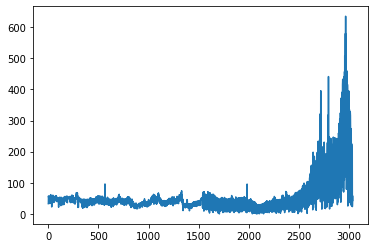

In [322]:
series = Elec_index["Elec Index"]
series.plot()
#plt.savefig("TempIndex.png")
plt.show()

In [320]:
write_elecindex_path = Path("__file__").parent.joinpath("Manipulated_Data", "Electricity_Data").parent.joinpath("Electricity_Data", "Electricity Index.csv")
Elec_index.to_csv(write_elecindex_path)